Exploracion de datos y preprocesamiento.
Se selecciono un set de datos de la plataforma Kaggler, el cual se llama 'Water in Australia', este cuenta con variables meteorlogicas. Este conjunto de datos contiene aproximadamente 10 años de observaciones meteorológicas diarias desde muchos lugares de Australia.

RainTomorrow es la variable objetivo a predecir. Significa: ¿llovió al día siguiente, sí o no? Esta columna es Sí si la lluvia de ese día fue de 1 mm o más.

0. Carga de dataframe.
1. Se explorará las dimensiones de nuestro dataset y se haran unas previsualizaciones.
2. Se harán algunas validaciones estadisticas de nuestras variables disponibles.
3. Se hará un analisis univarido sobre nuestra variable respuesta para mirar su distribucion.
4. Haremos un analisis de tipologia de datos de cada una de nuestras variables para determinar su naturaleza y validaremos nulidad.
5. Se realiza una validacion de cardinalidad de las variables categoricas.
6. se determina la estrategia de codificacion su naturaleza, ya sea en one hot encoding o un decode binario para asi eliminar nulidad.
7. Validacion de Outliers.
8. Imputacion, que variables se deben imputar.
9. deteccion de outliers.
10. Codificacion.

- El punto 10 se creara el pipeline para dejar la base lista para modelacion.


0. carga

In [2]:
%%time
import pandas as pd
data = pd.read_csv(r"D:\Prueba_ML\weatherAUS.csv")

Wall time: 3.28 s


1. Se explorará las dimensiones de nuestro dataset y se haran unas previsualizaciones.

In [3]:
data.shape

(145460, 23)

In [4]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

2. validaciones estadisticas

In [6]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


Analisis de variable objetivo, se evidencia presencia de outliers en Rainfall, Evaporation, WindGustSpeed, WindSpeed9am, WindSpeed3pm

In [7]:
data['RainTomorrow'].isnull().sum() #conteo de nulidad en variable objetivo.

3267

Se encuentran valores nulos en la vo, se deben eliminar de nuestra base

In [8]:
data['RainTomorrow'].nunique() #valores distintivos de mi VO.

2

In [9]:
data['RainTomorrow'].unique() #Cuales son estos valores distintivos.

array(['No', 'Yes', nan], dtype=object)

In [10]:
data['RainTomorrow'].value_counts() #hacemos un conteo de los valores de la distribucion.

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [11]:
data['RainTomorrow'].value_counts(normalize=True) * 100 #distribucion porcentual.

No     77.581878
Yes    22.418122
Name: RainTomorrow, dtype: float64

La distribucion porcentual parece optima para modelar ya que hay una cantidad de 'Yes' significativa

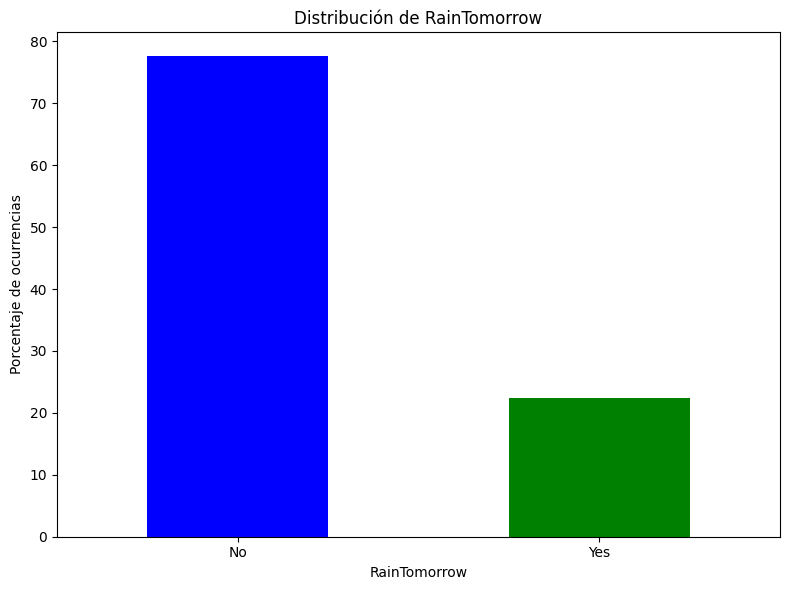

In [12]:
import matplotlib.pyplot as plt


porcentaje_ocurrencias = data['RainTomorrow'].value_counts(normalize=True) * 100

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
porcentaje_ocurrencias.plot(kind='bar', color=['blue', 'green'])
plt.title('Distribución de RainTomorrow')
plt.xlabel('RainTomorrow')
plt.ylabel('Porcentaje de ocurrencias')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

No se visualizan los valores nulos en la VO aunque sabemos que existen y se deben eliminar

Validacion de variables caracteristicas.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [14]:
print(data.columns)

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


Observando la tipologia de las variables observamos que hay 7 variables categoricas en la que se incluye nuestra VO

In [15]:
for columna in data.columns:
    print('columnas {}: {}'.format(columna,data[columna].unique())) # validacion de valores unicos de cada columna

columnas Date: ['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31']
columnas Location: ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
columnas MinTemp: [13.4  7.4 12.9  9.2 17.5 14.6 14.3  7.7  9.7 13.1 15.9 12.6  8.4  9.8
 14.1 13.5 11.2 11.5 17.1 20.5 15.3 16.2 16.9 20.1 19.7 12.5 12.  11.3
  9.6 10.5 12.3 13.7 16.1 14.  17.  17.3 17.2 17.4 19.8 14.9 13.9 18.6
 19.3 24.4 18.8 20.8 15.7 18.5 20.4 21.8 22.3 22.  28.  21.5 21.7 23.

columnas Evaporation: [     nan 1.20e+01 1.48e+01 1.26e+01 1.08e+01 1.14e+01 1.12e+01 1.30e+01
 9.80e+00 1.46e+01 1.10e+01 1.28e+01 1.38e+01 1.64e+01 1.74e+01 1.60e+01
 1.36e+01 8.00e+00 8.20e+00 8.60e+00 1.42e+01 1.58e+01 1.62e+01 1.34e+01
 1.44e+01 1.18e+01 1.56e+01 1.52e+01 1.16e+01 9.60e+00 6.60e+00 6.00e-01
 6.00e+00 3.00e+00 2.00e+00 5.20e+00 9.00e+00 1.02e+01 1.00e+01 7.40e+00
 8.40e+00 9.20e+00 9.40e+00 1.24e+01 1.04e+01 7.20e+00 6.80e+00 7.60e+00
 4.40e+00 6.40e+00 7.80e+00 7.00e+00 8.80e+00 6.20e+00 5.80e+00 2.00e-01
 2.40e+00 1.80e+00 2.20e+00 2.80e+00 5.00e+00 5.60e+00 4.80e+00 4.20e+00
 4.00e+00 3.20e+00 4.60e+00 3.40e+00 3.60e+00 0.00e+00 1.40e+00 3.80e+00
 8.00e-01 2.60e+00 1.60e+00 1.20e+00 1.00e+00 5.40e+00 1.06e+01 1.68e+01
 1.70e+01 2.02e+01 1.40e+01 1.72e+01 1.22e+01 1.50e+01 1.82e+01 1.32e+01
 4.10e+00 1.70e+00 4.00e-01 1.90e+00 6.48e+01 3.20e+01 2.62e+01 2.46e+01
 2.33e+01 1.54e+01 3.26e+01 3.04e+01 3.44e+01 1.80e+01 4.94e+01 1.88e+01
 1.90e+01 1.84e+01 8.10e+00 4

In [3]:
for columna in data.columns: #cardinalidad de variables
    print('columna {}: {}'.format(columna, data[columna].nunique()))

columnas Date: 3436
columnas Location: 49
columnas MinTemp: 389
columnas MaxTemp: 505
columnas Rainfall: 681
columnas Evaporation: 358
columnas Sunshine: 145
columnas WindGustDir: 16
columnas WindGustSpeed: 67
columnas WindDir9am: 16
columnas WindDir3pm: 16
columnas WindSpeed9am: 43
columnas WindSpeed3pm: 44
columnas Humidity9am: 101
columnas Humidity3pm: 101
columnas Pressure9am: 546
columnas Pressure3pm: 549
columnas Cloud9am: 10
columnas Cloud3pm: 10
columnas Temp9am: 441
columnas Temp3pm: 502
columnas RainToday: 2
columnas RainTomorrow: 2


Se hace la buscada de registros duplicados

In [16]:
registros_duplicados = data.duplicated().sum()
print("Número de registros duplicados:", registros_duplicados)

Número de registros duplicados: 0


In [17]:
var_cat = [var for var in data.columns if data[var].dtype=='O'] # Con esta list comprehension obtenemos los encabezados de estas variables

In [18]:
print(len(var_cat))

7


In [19]:
print(var_cat)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


Se debe validar la cardinalidad de estas variables para determinar el tipo de codificacion que se debe aplicar.

In [20]:
for v in var_cat:  
    print(v, len(data[v].unique()))

Date 3436
Location 49
WindGustDir 17
WindDir9am 17
WindDir3pm 17
RainToday 3
RainTomorrow 3


- La variable 'Date' presenta una cardinalidad muy alta. Por lo que se debe separar en tres variables diferentes con una cardinalidad mas pequeña.
- Las variables WindGustDir, WindDir9am, WindDir3pm resentan cardinalidades aceptables por lo que se aplicara una codificacion One hot.
- las variables RainToday y RainTomorrow presentan 2 valores unicos sin contar el null, estas se codificaran de manera binaria.

Validacion de nulidad.

In [21]:
for columna in data.columns:
    if columna != 'RainTomorrow':
        suma_nulos_columna = data[columna].isnull().sum()
        porcentaje_nulos_columna = (suma_nulos_columna / len(data)) * 100
        print("Porcentaje de valores nulos en la columna {} es {}".format(columna, porcentaje_nulos_columna))

Porcentaje de valores nulos en la columna Date es 0.0
Porcentaje de valores nulos en la columna Location es 0.0
Porcentaje de valores nulos en la columna MinTemp es 1.0208992162793895
Porcentaje de valores nulos en la columna MaxTemp es 0.8669049910628353
Porcentaje de valores nulos en la columna Rainfall es 2.2418534304963567
Porcentaje de valores nulos en la columna Evaporation es 43.166506256015396
Porcentaje de valores nulos en la columna Sunshine es 48.00976213391998
Porcentaje de valores nulos en la columna WindGustDir es 7.098858792795271
Porcentaje de valores nulos en la columna WindGustSpeed es 7.055547916953114
Porcentaje de valores nulos en la columna WindDir9am es 7.263852605527293
Porcentaje de valores nulos en la columna WindDir3pm es 2.906641000962464
Porcentaje de valores nulos en la columna WindSpeed9am es 1.214766946239516
Porcentaje de valores nulos en la columna WindSpeed3pm es 2.105046060772721
Porcentaje de valores nulos en la columna Humidity9am es 1.824556579128

Algunas variables tienen porcentajes de nulidad muy altos por lo que se deben imputar.
La tecnica de imputacion que podemos usar es reemplazar esos valores nulos por muestras aleatorias siempre y cuando no hayan outliers, en caso de que hayan outliers imputan los valores faltantes con la mediana.

Como se observo en uno de los primeros pasos, se detectaron outliers en algunas columnas.

In [22]:
data[['Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']].describe()

,Rainfall,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm
count,142199.000000,82670.000000,135197.000000,143693.000000,142398.000000
mean,2.360918,5.468232,40.035230,14.043426,18.662657
std,8.478060,4.193704,13.607062,8.915375,8.809800
min,0.000000,0.000000,6.000000,0.000000,0.000000
25%,0.000000,2.600000,31.000000,7.000000,13.000000
50%,0.000000,4.800000,39.000000,13.000000,19.000000
75%,0.800000,7.400000,48.000000,19.000000,24.000000
max,371.000000,145.000000,135.000000,130.000000,87.000000


Se procede a grafica un diagrama de bigotes para evidenciar los Outliders en estas variables.

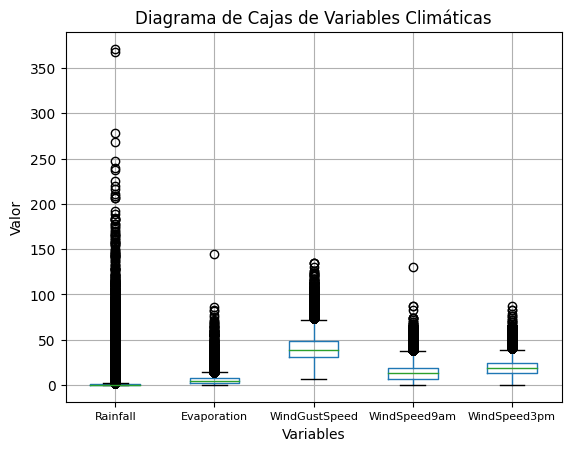

In [23]:
columnas_seleccionadas = ['Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']

# Crear el diagrama de cajas
data[columnas_seleccionadas].boxplot()

# Añadir título al diagrama
plt.title('Diagrama de Cajas de Variables Climáticas')
plt.ylabel('Valor')
plt.xlabel('Variables')

# Mostrar el diagrama de cajas
plt.xticks(fontsize=8)
plt.show()

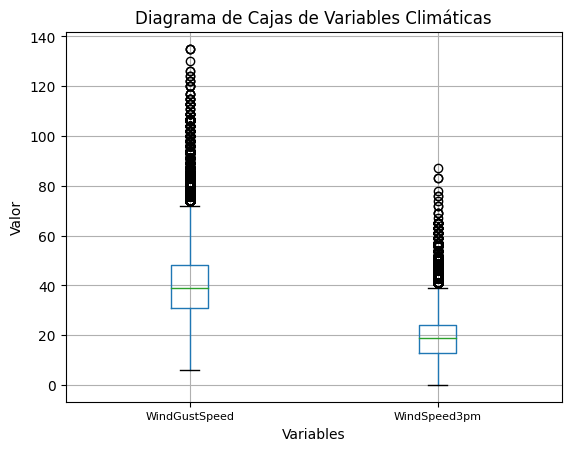

In [24]:
columnas_seleccionadas = ['WindGustSpeed', 'WindSpeed3pm']

# Crear el diagrama de cajas
data[columnas_seleccionadas].boxplot()

# Añadir título al diagrama
plt.title('Diagrama de Cajas de Variables Climáticas')
plt.ylabel('Valor')
plt.xlabel('Variables')

# Mostrar el diagrama de cajas
plt.xticks(fontsize=8)
plt.show()

Se procede a calcular los valores atipicos extremos para limitar los rangos. Para eso se hace uso de las definiciones estadisticas donde un valor atipico es donde:
q < Q1 - 1.5 * IQR ó q > Q3 + 1.5 * IQR.
Rango intercuartilico (IQR) = data[columna].quantile(0.75 - data[columna].quantile(0.25)

In [25]:
for columna in ['Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']:
    IQR = data[columna].quantile(0.75) - data[columna].quantile(0.25)
    rango_inferior = data[columna].quantile(0.25) - (IQR * 1.5)
    rango_superior = data[columna].quantile(0.75) + (IQR * 1.5)
    print("Límites para la variable {} : Inferior = {}, Superior = {}".format(columna, rango_inferior, rango_superior))

Límites para la variable Rainfall : Inferior = -1.2000000000000002, Superior = 2.0
Límites para la variable Evaporation : Inferior = -4.600000000000001, Superior = 14.600000000000001
Límites para la variable WindGustSpeed : Inferior = 5.5, Superior = 73.5
Límites para la variable WindSpeed9am : Inferior = -11.0, Superior = 37.0
Límites para la variable WindSpeed3pm : Inferior = -3.5, Superior = 40.5


Los outliers detectados se deben deliminar para que el modelo entrene con una base con valores muy consistentes.
La tecnica de imputacion sera reemplazar los valores nulos por las medianas debido a los outliers presentes.

HASTA LLEGA EL ANALISIS EXPLORATORIO DE LOS DATOS DONDE SE DEBEN APLICAR VARIOS PASOS EN EL PROCESAMIENTO DE LOS DATOS:

-Imputaciones.

-Eliminacion de outliers.

-Eliminacion de registros con VO nula.

-Codificacion de variables.
